In [1]:
import torch
import torchvision
from datasets import get_dataset, get_dataloaders
import matplotlib.pyplot as plt
import random  # Ensure random is imported
import numpy as np
from torch.utils.data import DataLoader

# Helper Functions

In [2]:
def visualize_sample(dataset, sample_index):
    """
    Visualize a single sample from the dataset along with its metadata.
    
    Args:
        dataset: The dataset object
        sample_index: Index of the sample to visualize
    """
    sample_image, sample_latent = dataset[sample_index]
    plt.figure(figsize=(4, 4))
    plt.imshow(sample_image.permute(1, 2, 0))
    plt.title(f'Sample #{sample_index}')
    plt.axis('off')
    plt.show()
    
    print('Shape of image:', sample_image.shape)
    print('latent values:', sample_latent)
    print('latent values:(shape)', sample_latent.shape)

def visualize_grid(dataset, n=4):
    """
    Create a grid of random samples from the dataset.
    
    Args:
        dataset: The dataset object
        n: Grid size (n x n)
    """
    indices = random.sample(range(len(dataset)), n * n)  # Random indices without replacement
    fig, axes = plt.subplots(n, n, figsize=(5, 5))
    for i in range(n):
        for j in range(n):
            idx = indices[i * n + j]
            axes[i, j].imshow(dataset[idx][0].permute(1, 2, 0))
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
    return indices  # Return the indices used in case they're needed later

# Dsprites

In [3]:
Dsprites = get_dataset('dsprites')
# dsprites = Dsprites(selected_factors=['color','shape', 'scale', 'orientation'], not_selected_factors_index_value={'posX': 0, 'posY': 0})
# dsprites = Dsprites(selected_factors=['color','shape', 'posX', 'posY'], not_selected_factors_index_value={'scale': 0, 'orientation': 0})
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [7]:
dsprites[10]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 array([1.        , 1.        , 0.5       , 0.        , 0.        ,
        0.32258065]))

In [5]:
len(dsprites)

737280

In [6]:
dsprites_dataloader = DataLoader(dsprites, batch_size=64, shuffle=True)
for batch in dsprites_dataloader:
    images, latents = batch
    print('Batch shape:', images.shape)
    print('Latents shape:', latents.shape)
    break

Batch shape: torch.Size([64, 1, 64, 64])
Latents shape: torch.Size([64, 6])


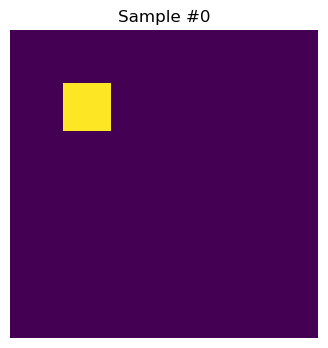

Shape of image: torch.Size([1, 64, 64])
latent values: [1.  1.  0.5 0.  0.  0. ]
latent values:(shape) (6,)


In [7]:
sample_index = 0
visualize_sample(dsprites, sample_index)

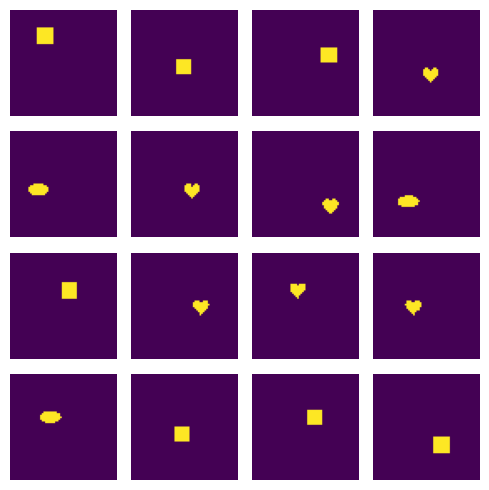

[160,
 498,
 939,
 2647,
 1075,
 2708,
 3037,
 1210,
 615,
 2865,
 2407,
 2321,
 1290,
 468,
 682,
 794]

In [8]:
n = 4  # Define the grid size (n x n)
visualize_grid(dsprites, n)

# Shape3D

In [5]:
Shapes3D = get_dataset('shapes3d')
shapes3d = Shapes3D(selected_factors='all', not_selected_factors_index_value=None)
# shapes3d = Shapes3D(selected_factors=['floorCol', 'wallCol', 'objCol'], not_selected_factors_index_value={'objSize': 0, 'objType': 0, 'objAzimuth': 0})

In [6]:
shapes3d[0]

(tensor([[[0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9216, 0.9294, 0.9255],
          [1.0000, 1.0000, 1.0000,  ..., 0.9020, 0.8824, 0.9059],
          [1.0000, 1.0000, 1.0000,  ..., 0.9020, 0.9059, 0.9412]],
 
         [[0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ...,

In [ ]:
shapes3d_dataloader = DataLoader(shapes3d, batch_size=64, shuffle=True)
for batch in shapes3d_dataloader:
    images, latents = batch
    print('Batch shape:', images.shape)
    print('Latents shape:', latents.shape)
    break

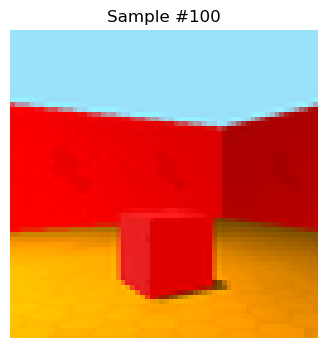

Shape of image: torch.Size([3, 64, 64])
latent values: [ 0.          0.          0.          0.82142857  2.         12.85714286]
latent values:(shape) (6,)


In [10]:
sample_index = 100
visualize_sample(shapes3d, sample_index)

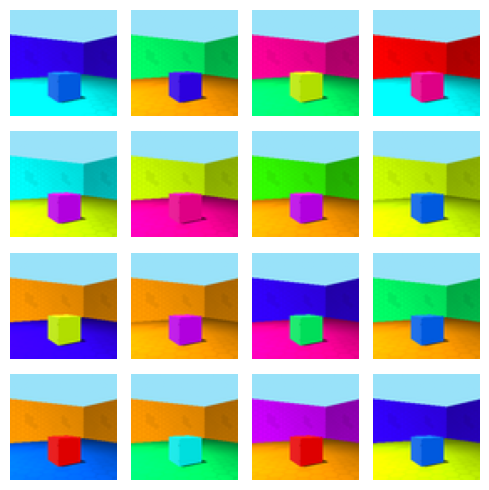

[576,
 147,
 492,
 509,
 258,
 929,
 138,
 226,
 712,
 118,
 974,
 146,
 610,
 415,
 180,
 276]

In [14]:
n = 4  # Define the grid size (n x n)
visualize_grid(shapes3d, n)

# Cars3D

In [4]:
Cars3D = get_dataset('cars3d')
# cars3d = Cars3D(selected_factors='all', not_selected_factors_index_value=None)
cars3d = Cars3D(selected_factors=['elevation', 'azimuth'], not_selected_factors_index_value={'object_type': 0})

In [5]:
len(cars3d)

96

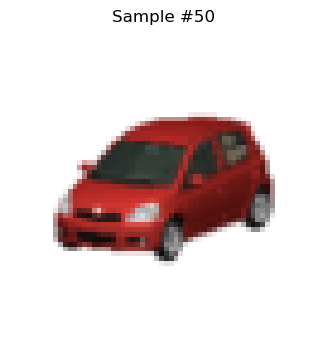

Shape of image: torch.Size([3, 64, 64])
latent values: [0.66666667 0.08695652 0.        ]
latent values:(shape) (3,)


In [7]:
sample_index = 50
visualize_sample(cars3d, sample_index)

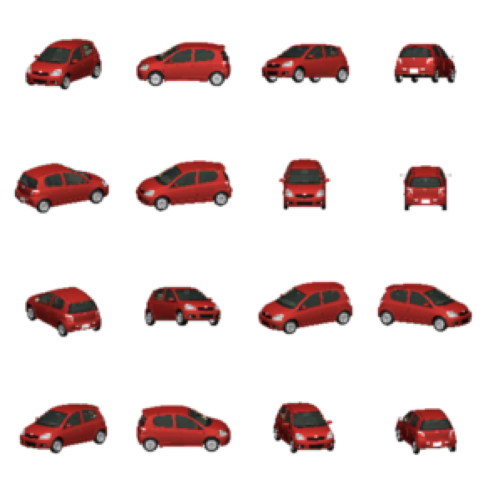

[50, 54, 3, 13, 88, 77, 48, 60, 82, 22, 76, 68, 51, 90, 71, 59]

In [16]:
n = 4  # Define the grid size (n x n)
visualize_grid(cars3d, n)

# Dataloader

In [9]:
Dsprites = get_dataset('dsprites')
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [10]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(dsprites, batch_size=batch_size, shuffle=True)

# Dataloader (optimal num of workers)

In [11]:
from utils.io import find_optimal_num_workers

In [2]:
Shapes3D = get_dataset('shapes3d')
shapes3d = Shapes3D(selected_factors='all', not_selected_factors_index_value=None)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  255M  100  255M    0     0  66.5M      0  0:00:03  0:00:03 --:--:-- 66.5M


In [10]:
find_optimal_num_workers(shapes3d, batch_size=64, num_batches_to_test=1000, num_warmup_batches=100)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 100 batches...
  num_workers=0: 0.00868 sec/batch
  num_workers=1: Warming up with 100 batches...
  num_workers=1: 0.00534 sec/batch
  num_workers=2: Warming up with 100 batches...
  num_workers=2: 0.00359 sec/batch
  num_workers=3: Warming up with 100 batches...
  num_workers=3: 0.00277 sec/batch
  num_workers=4: Warming up with 100 batches...
  num_workers=4: 0.00296 sec/batch
  num_workers=5: Warming up with 100 batches...
  num_workers=5: 0.00385 sec/batch
  num_workers=6: Warming up with 100 batches...
  num_workers=6: 0.00231 sec/batch
  num_workers=7: Warming up with 100 batches...
  num_workers=7: 0.00359 sec/batch
  num_workers=8: Warming up with 100 batches...
  num_workers=8: 0.00260 sec/batch
Optimal num_workers: 6 (0.00231 sec/batch)


6

In [13]:
Dsprites = get_dataset('dsprites')
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18.4M  100 18.4M    0     0  15.5M      0  0:00:01  0:00:01 --:--:-- 15.5M


In [14]:
find_optimal_num_workers(dsprites, batch_size=64, num_batches_to_test=1000, num_warmup_batches=100)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 100 batches...
  num_workers=0: 0.00611 sec/batch
  num_workers=1: Warming up with 100 batches...
  num_workers=1: 0.00358 sec/batch
  num_workers=2: Warming up with 100 batches...
  num_workers=2: 0.00222 sec/batch
  num_workers=3: Warming up with 100 batches...
  num_workers=3: 0.00161 sec/batch
  num_workers=4: Warming up with 100 batches...
  num_workers=4: 0.00178 sec/batch
  num_workers=5: Warming up with 100 batches...
  num_workers=5: 0.00187 sec/batch
  num_workers=6: Warming up with 100 batches...
  num_workers=6: 0.00140 sec/batch
  num_workers=7: Warming up with 100 batches...
  num_workers=7: 0.00250 sec/batch
  num_workers=8: Warming up with 100 batches...
  num_workers=8: 0.00186 sec/batch
Optimal num_workers: 6 (0.00140 sec/batch)


6